# Pandas Time series

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
bitcoin = pd.read_csv('dataset/BTC-EUR.csv', index_col='Date', parse_dates=True)
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


<Axes: xlabel='Date'>

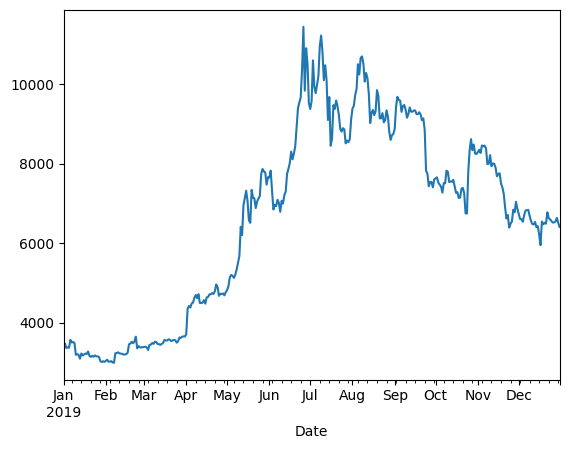

In [28]:
bitcoin['Close']['2019'].plot()

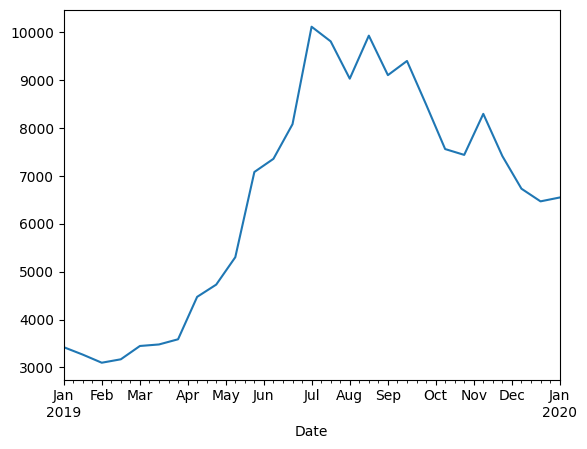

In [27]:
bitcoin.loc['2019', 'Close'].resample('2W').mean().plot()
plt.show()

<Axes: xlabel='Date'>

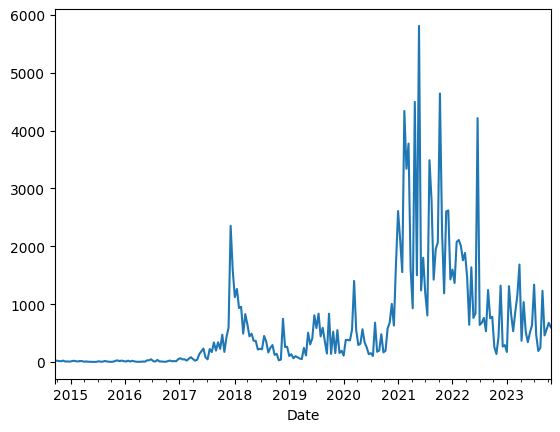

In [33]:
bitcoin['Close'].resample('2W').std().plot()

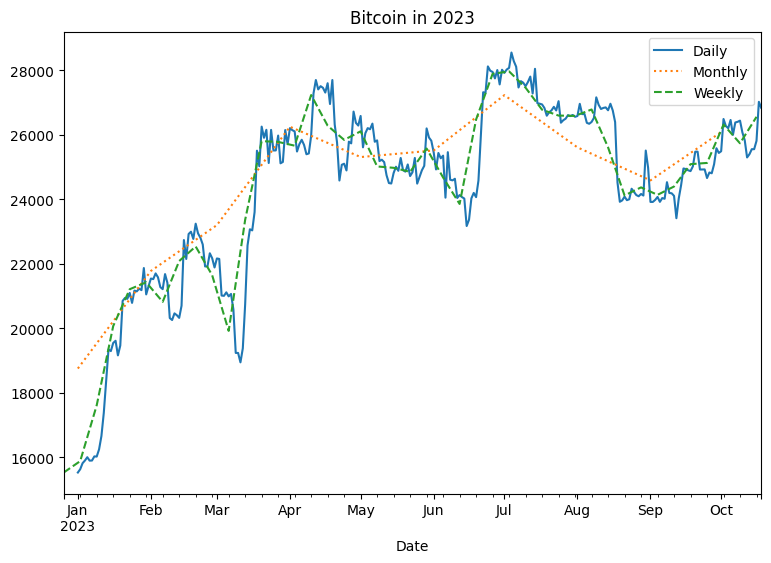

In [43]:
plt.figure(figsize=(9,6))
bitcoin['Close']['2023'].plot(label='Daily')
bitcoin['Close']['2023'].resample('M').mean().plot(label='Monthly', ls=':')
bitcoin['Close']['2023'].resample('W').mean().plot(label='Weekly', ls='--')
plt.title('Bitcoin in 2023')
plt.legend()
plt.show()

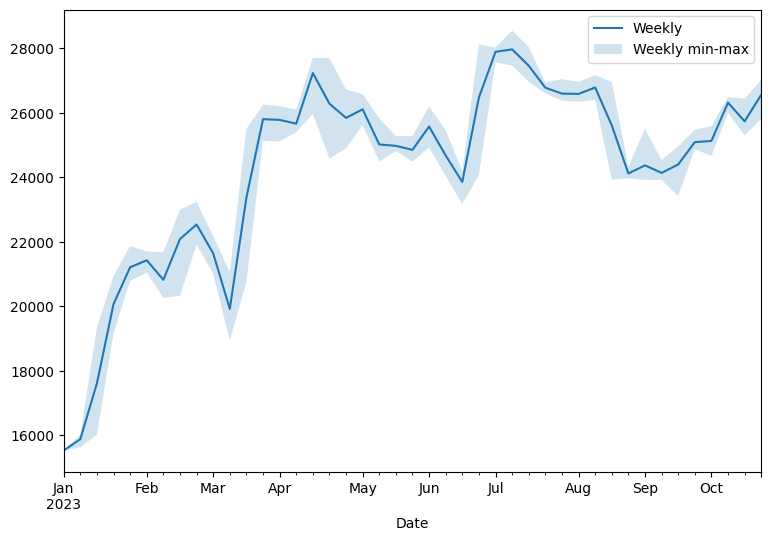

In [48]:
m = bitcoin['Close']['2023'].resample('W').agg(['mean', 'std', 'min', 'max'])
plt.figure(figsize=(9,6))
m['mean']['2023'].plot(label='Weekly')
plt.fill_between(m.index, m['min'], m['max'], alpha=0.2, label='Weekly min-max')
plt.legend()
plt.show()

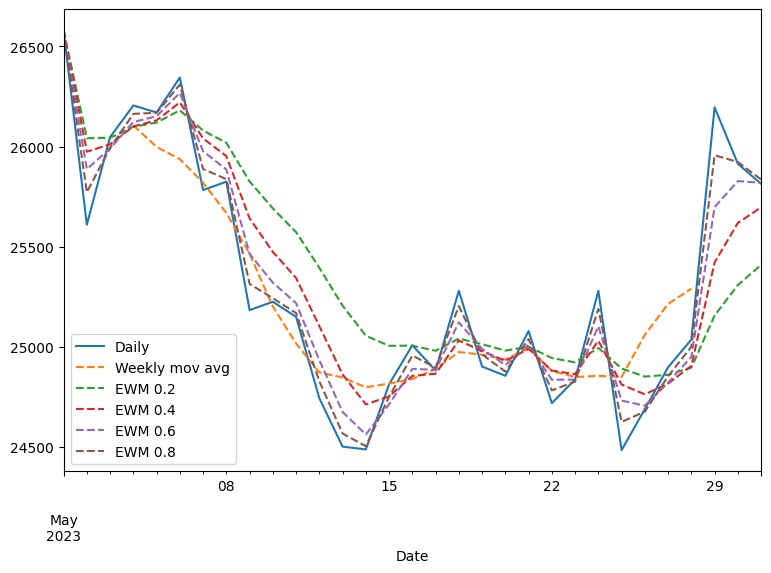

In [63]:
plt.figure(figsize=(9,6))
d = '2023-05'
bitcoin['Close'][d].plot(label='Daily')
bitcoin['Close'][d].rolling(window=7, center=True).mean().plot(label='Weekly mov avg', ls='--')
for alpha in np.arange(0.2, 1, 0.2):
    bitcoin['Close'][d].ewm(alpha=alpha).mean().plot(label=f'EWM {alpha:0.0}', ls='--')
plt.legend()
plt.show()